In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe([0, 0.05, .50, .95, .99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,0.00000,3.0000,10.00000,13.00000,17.00,17.00
Glucose,768.0,120.894531,31.972618,0.000,0.000,79.00000,117.0000,181.00000,196.00000,199.00,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.000,38.70000,72.0000,90.00000,106.00000,122.00,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,44.00000,51.33000,99.00,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,293.00000,519.90000,846.00,846.00
BMI,768.0,31.992578,7.884160,0.000,0.000,21.80000,32.0000,44.39500,50.75900,67.10,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.078,0.14035,0.3725,1.13285,1.69833,2.42,2.42
Age,768.0,33.240885,11.760232,21.000,21.000,21.00000,29.0000,58.00000,67.00000,81.00,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.00000,1.00,1.00


In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [11]:
cat_cols

['Outcome']

In [12]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
data.groupby("Outcome")[num_cols].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [16]:
for col in num_cols:
    print(col + ":", check_outlier(data, col))

Pregnancies: True
Glucose: True
BloodPressure: True
SkinThickness: True
Insulin: True
BMI: True
DiabetesPedigreeFunction: True
Age: True


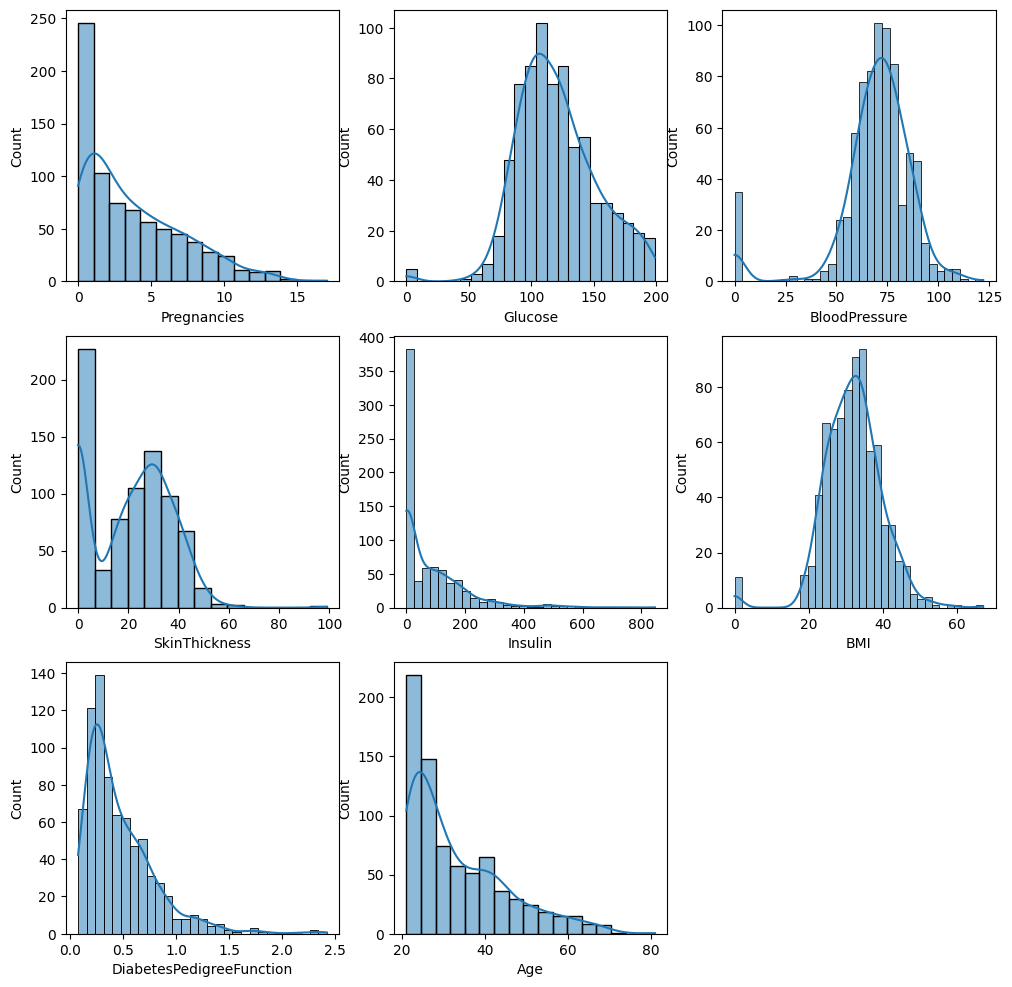

In [17]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data=data, kde=True)

plt.show()

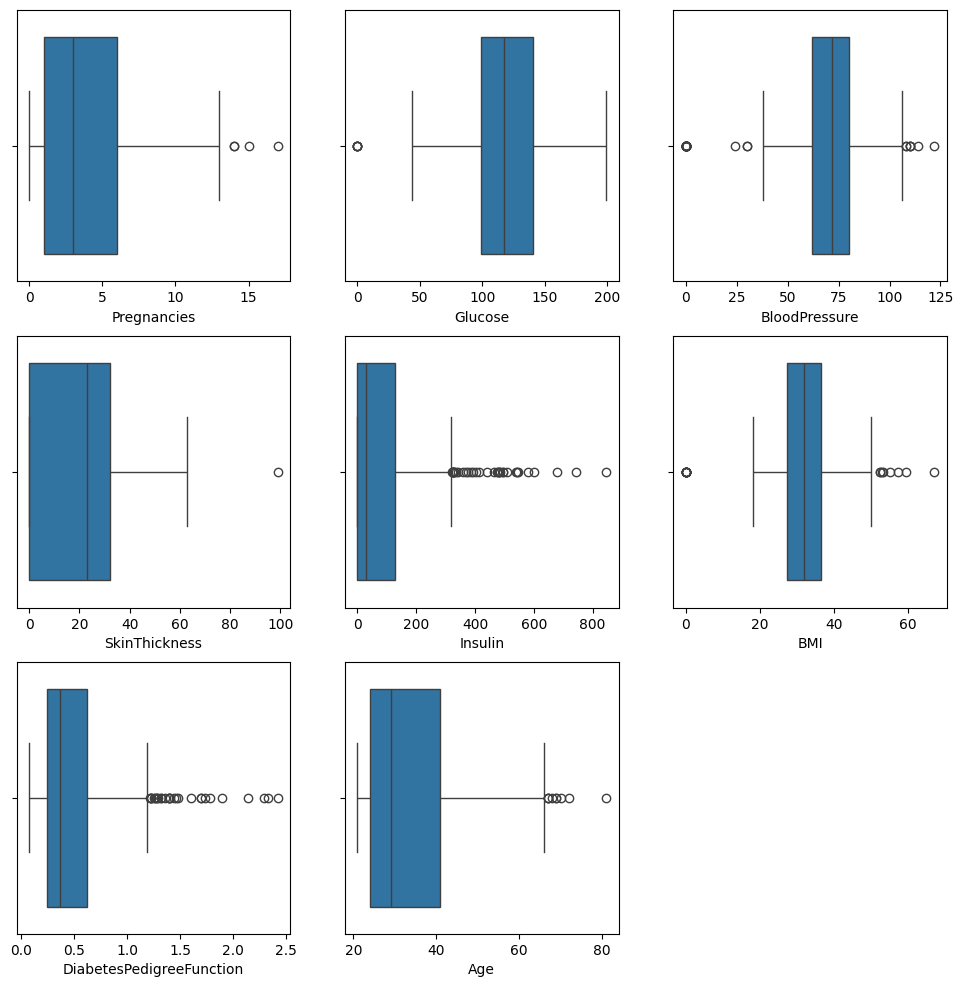

In [18]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data=data)

plt.show()

In [19]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
data_corr =data.corr()
data_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

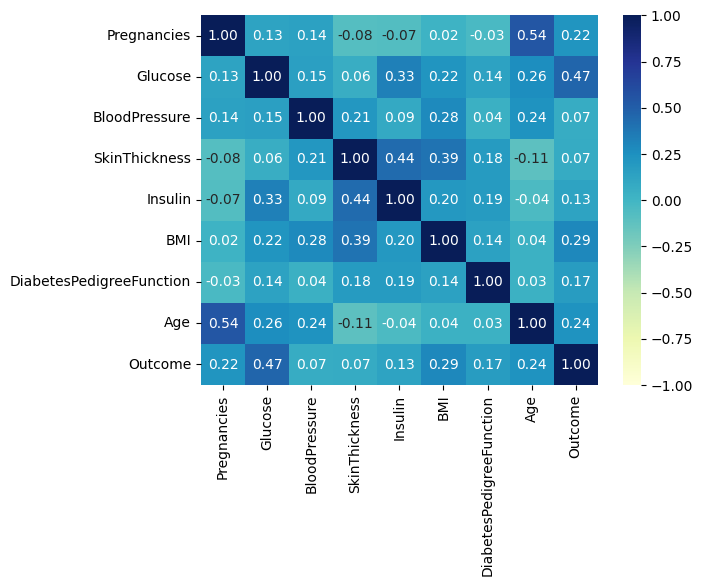

In [21]:
sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="YlGnBu")

In [22]:
for col in data.columns:
    min = data[col].min()
    max = data[col].max()
    print(f"{col} min - max: {min, max}")

Pregnancies min - max: (np.int64(0), np.int64(17))
Glucose min - max: (np.int64(0), np.int64(199))
BloodPressure min - max: (np.int64(0), np.int64(122))
SkinThickness min - max: (np.int64(0), np.int64(99))
Insulin min - max: (np.int64(0), np.int64(846))
BMI min - max: (np.float64(0.0), np.float64(67.1))
DiabetesPedigreeFunction min - max: (np.float64(0.078), np.float64(2.42))
Age min - max: (np.int64(21), np.int64(81))
Outcome min - max: (np.int64(0), np.int64(1))


In [23]:
nan_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[nan_cols] = data[nan_cols].replace(0, np.nan)

In [24]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

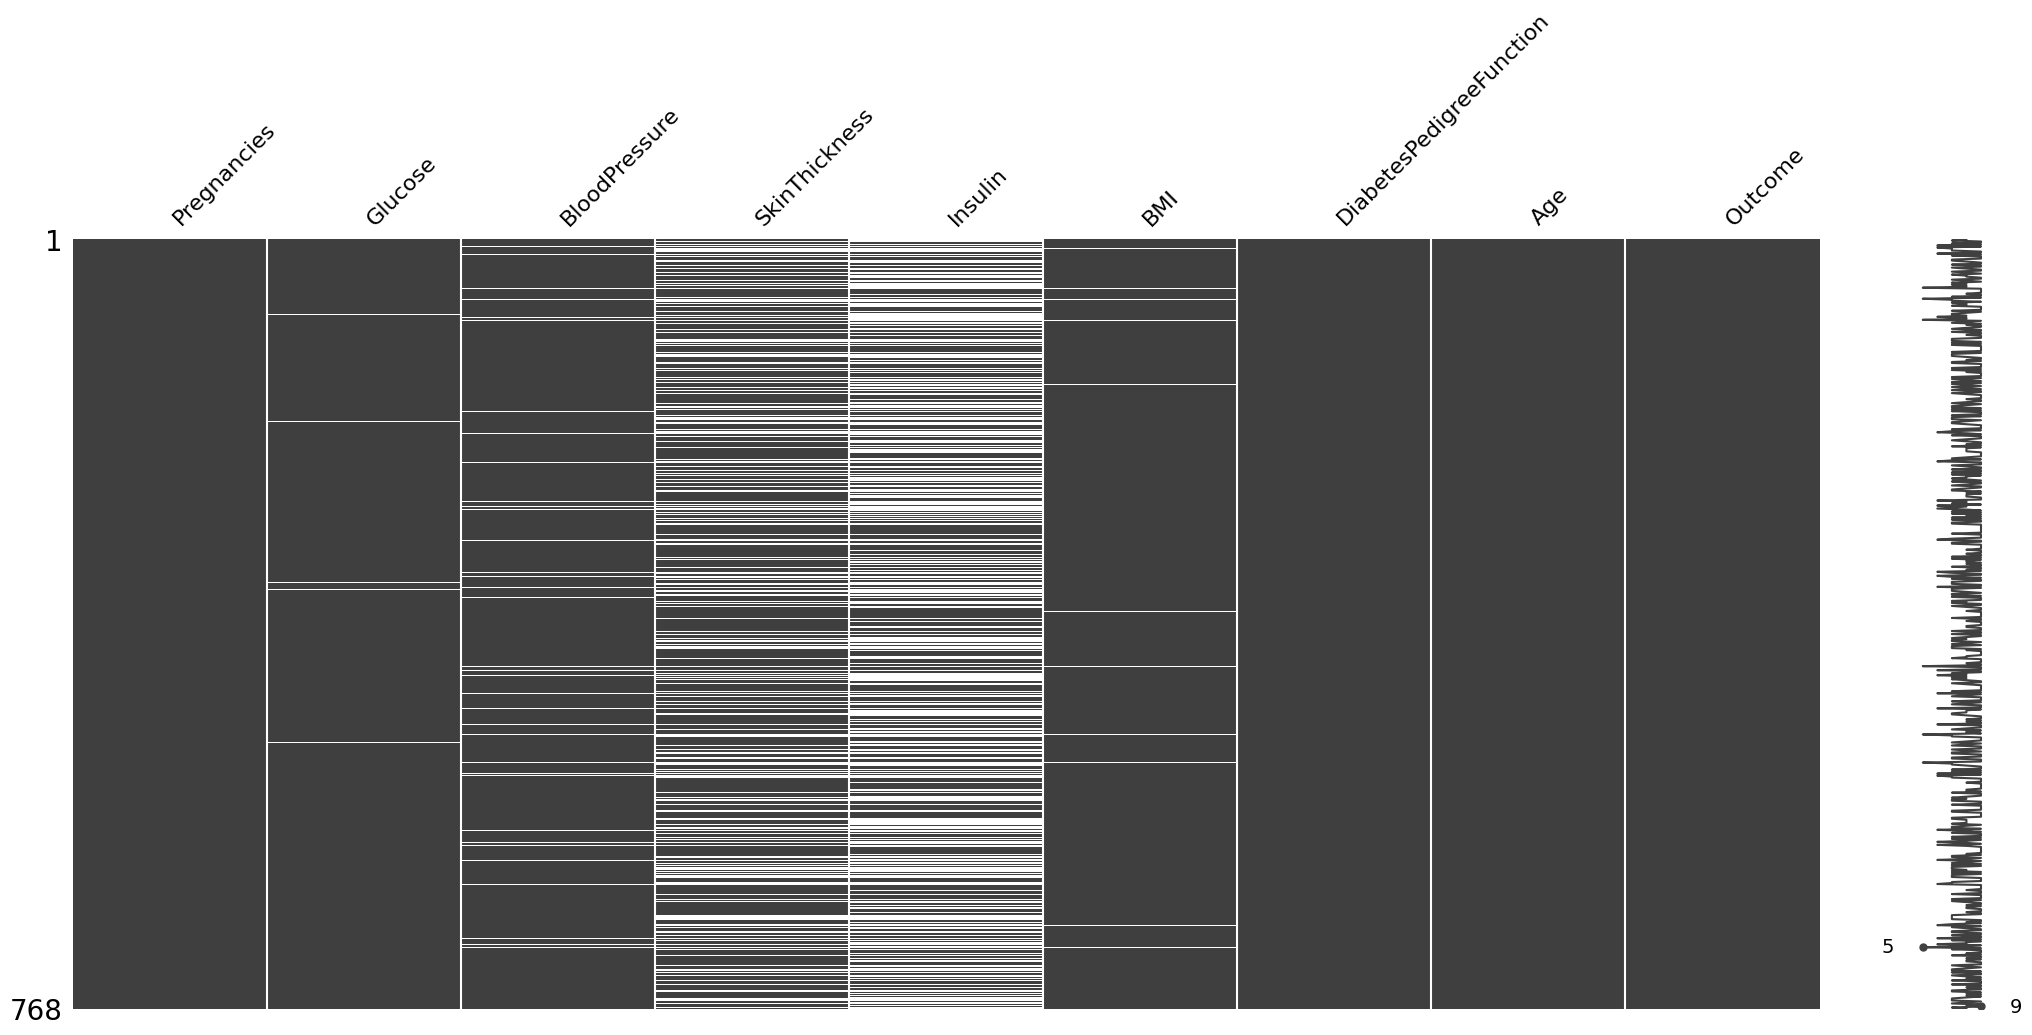

In [25]:
import missingno as msno
msno.matrix(data)

plt.show(block=True)

In [26]:
data.groupby("Outcome")[nan_cols].mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,
0,110.643863,70.877339,27.235457,130.287879,30.859674
1,142.319549,75.321429,33.000000,206.846154,35.406767


In [27]:
data.groupby("Outcome")[nan_cols].mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,
0,110.643863,70.877339,27.235457,130.287879,30.859674
1,142.319549,75.321429,33.000000,206.846154,35.406767


In [28]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

C:\Users\Fida\AppData\Local\Temp\ipykernel_1796\3128980070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
C:\Users\Fida\AppData\Local\Temp\ipykernel_1796\3128980070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [29]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


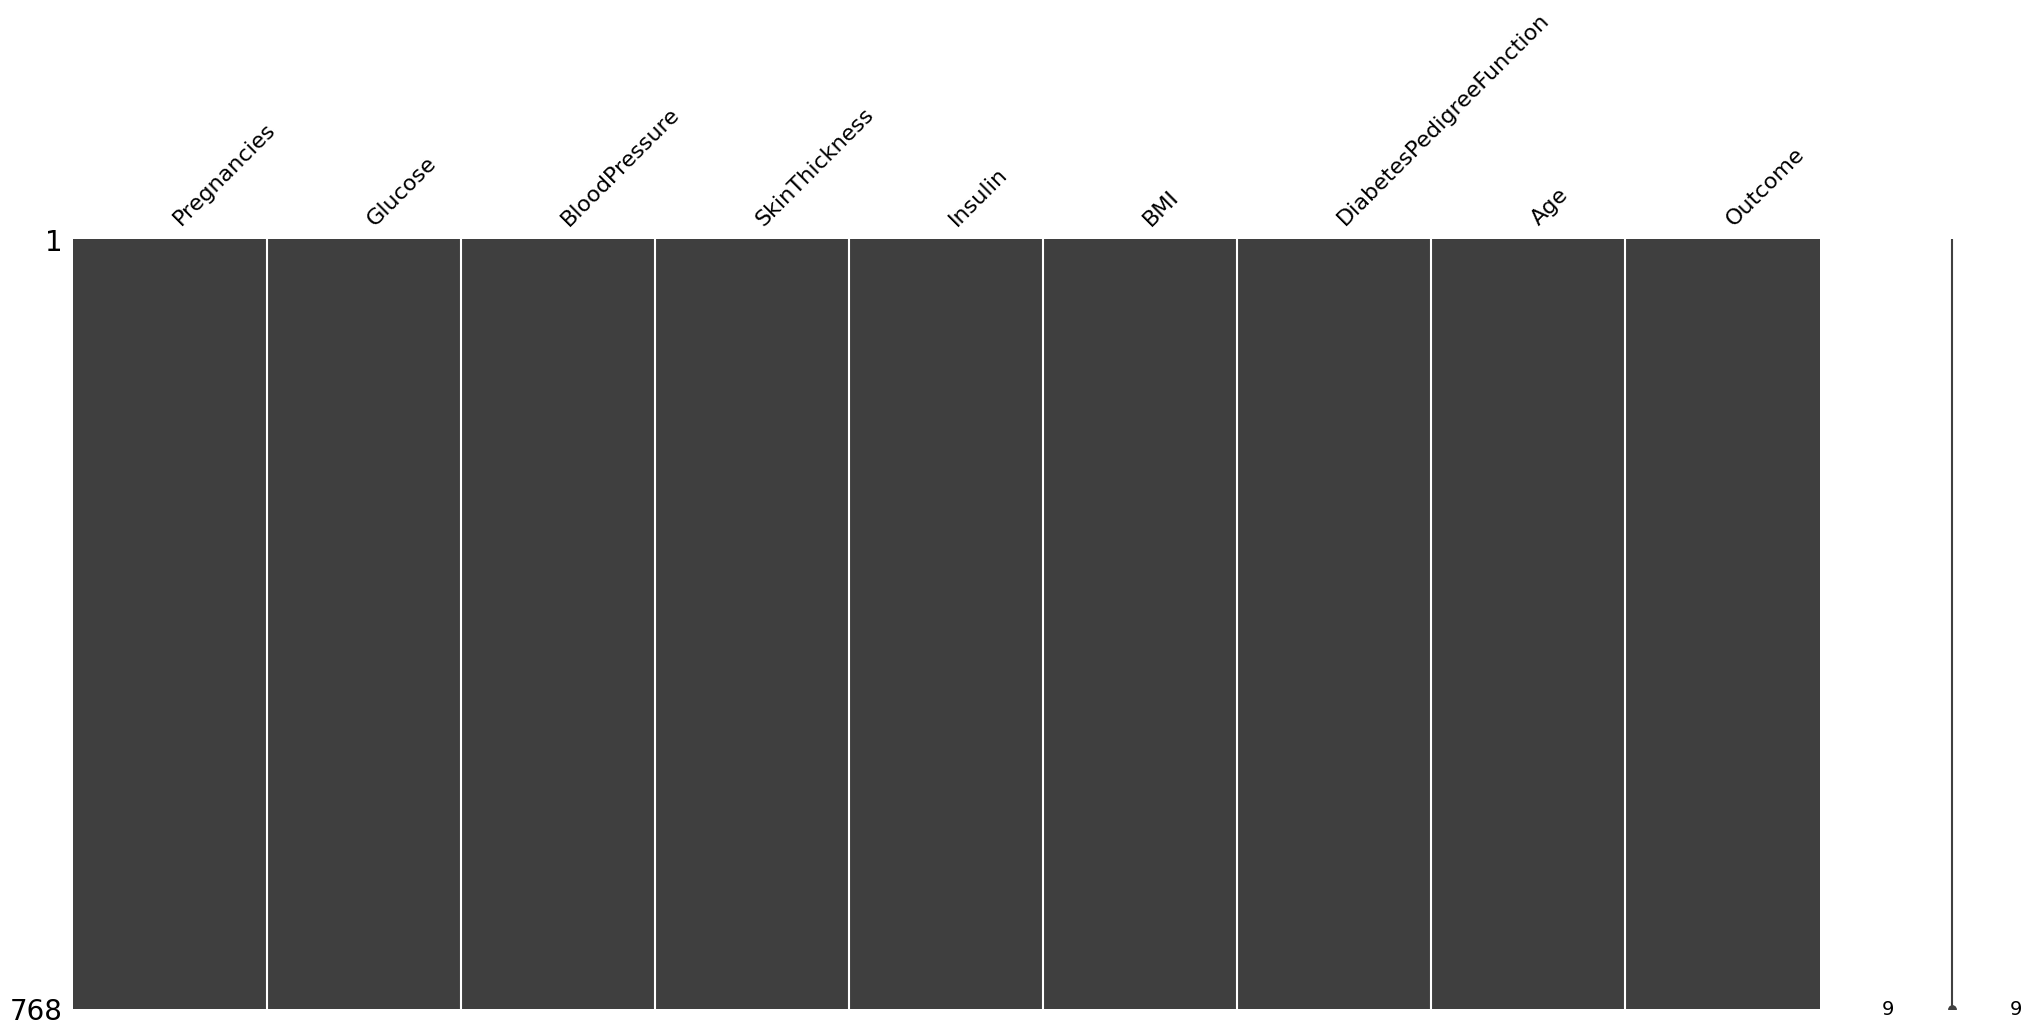

In [31]:
msno.matrix(data)

plt.show(block=True)

# Fix Outliers

In [32]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
for col in data.columns:
    replace_with_thresholds(data, col)

C:\Users\Fida\AppData\Local\Temp\ipykernel_1796\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
C:\Users\Fida\AppData\Local\Temp\ipykernel_1796\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
C:\Users\Fida\AppData\Local\Temp\ipykernel_1796\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype fir

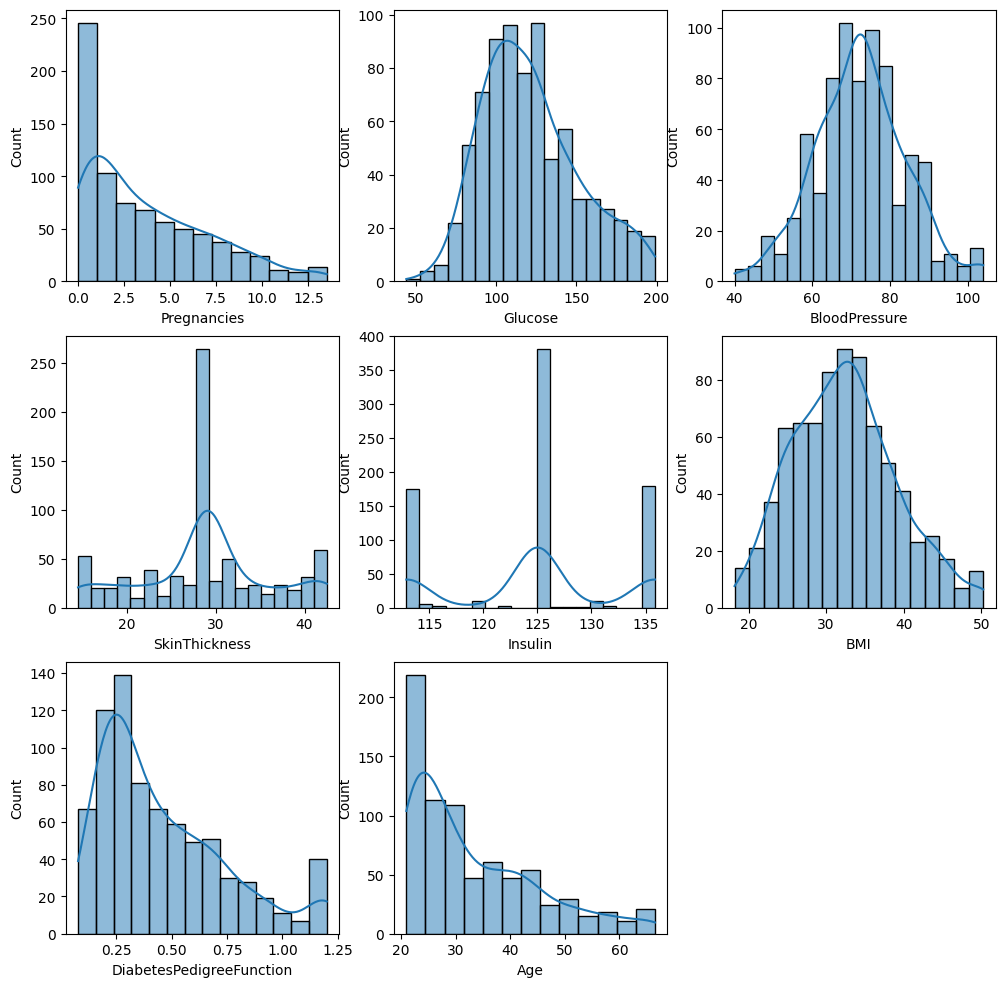

In [34]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data=data, kde=True)

plt.show()

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.000000,6.00000,13.500
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.000
BloodPressure,768.0,72.376538,11.696836,40.000,64.00000,72.202592,80.00000,104.000
SkinThickness,768.0,28.866536,7.442353,14.500,25.00000,29.000000,32.00000,42.500
Insulin,768.0,124.691081,7.913595,112.875,121.50000,125.000000,127.25000,135.875
BMI,768.0,32.393359,6.667471,18.200,27.50000,32.300000,36.60000,50.250
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.372500,0.62625,1.200
Age,768.0,33.199870,11.628404,21.000,24.00000,29.000000,41.00000,66.500
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.000


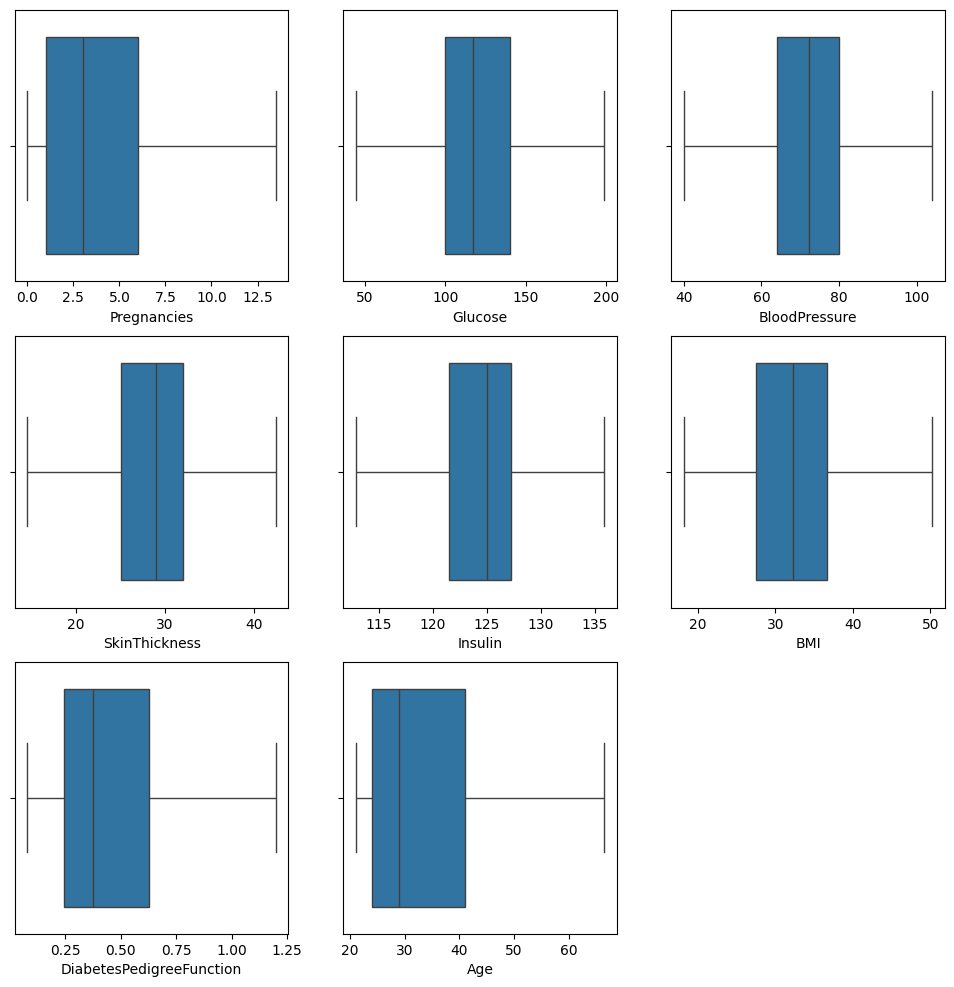

In [36]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data=data)

plt.show()

## Feature Engineering 

In [37]:
data.loc[(data['Pregnancies'] == 0), 'NewPregnancies'] = 'NoPregnancies'
data.loc[(data['Pregnancies'] > 0) & (data['Pregnancies'] <= 3), 'NewPregnancies'] = '1-3 Pregnancies'
data.loc[(data['Pregnancies'] > 3) & (data['Pregnancies'] <= 6), 'NewPregnancies'] = '4-6 Pregnancies'
data.loc[(data['Pregnancies'] > 6), 'NewPregnancies'] = "6 + Pregnancies"

In [38]:
data.loc[(data['Glucose'] < 70), 'NewGlucose'] = "Hypoglycemia"
data.loc[(data['Glucose'] >=70) & (data['Glucose'] <= 100),'NewGlucose'] = "Normal"
data.loc[(data['Glucose'] > 100) & (data['Glucose'] <= 125),'NewGlucose'] = "Pre Diabetic"
data.loc[(data['Glucose'] > 125), 'NewGlucose'] = "Diabetic"

In [39]:
data.loc[(data['BloodPressure'] < 80), 'NewBloodPressure'] = "Normal"
data.loc[(data['BloodPressure'] >=80) & (data['BloodPressure'] <= 89),'NewBloodPressure'] = "Elevated Blood Pres"
data.loc[(data['BloodPressure'] >=90) & (data['BloodPressure'] <= 120),'NewBloodPressure'] = "Hypertansion Stage Two"
data.loc[(data['BloodPressure'] > 120), 'NewBloodPressure'] = "Hypertansion Crises"

In [40]:
data["NewSkinThickness"] = pd.qcut(data["SkinThickness"],4,labels=["Level 1 Tickness","Level 2 Tickness","Level 3 Tickness","Level 4 Tickness"])

data.loc[(data['Insulin'] < 100), 'NewInsulin'] = "Normal"
data.loc[(data['Insulin'] >=100) & (data['Insulin'] <= 135),'NewInsulin'] = "Elevated"
data.loc[(data['Insulin'] > 135) & (data['Insulin'] <= 180),'NewInsulin'] = "Pre Diabetic"
data.loc[(data['Insulin'] > 180), 'NewInsulin'] = "Diabetic"

In [41]:
data.loc[(data['BMI'] < 25), 'NewBMI'] = "Normal"
data.loc[(data['BMI'] >=25) & (data['BMI'] <= 30),'NewBMI'] = "Overweight"
data.loc[(data['BMI'] > 30) & (data['BMI'] <= 35),'NewBMI'] = "Obese"
data.loc[(data['BMI'] > 35), 'NewBMI'] = "Extremly Obese"

In [42]:
data["NewDiabetesPedigreeFunction"] = pd.qcut(data["DiabetesPedigreeFunction"],4,labels=["Level 1 Pedigree","Level 2 Pedigree","Level 3 Pedigree","Level 4 Pedigree"])

In [43]:
data.loc[(data['Age'] < 30), 'NewAge'] ="Young"
data.loc[(data['Age'] >=30) & (data['Age'] <= 40),'NewAge'] = "Middle Age"
data.loc[(data['Age'] > 40) & (data['Age'] <= 55),'NewAge'] = "Mature"
data.loc[(data['Age'] > 35), 'NewAge'] = "Old"

In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 768
Variables: 17
cat_cols: 9
num_cols: 8
cat_but_car: 0
num_but_cat: 3


In [45]:
cat_cols

['NewPregnancies',
 'NewGlucose',
 'NewBloodPressure',
 'NewInsulin',
 'NewBMI',
 'NewAge',
 'Outcome',
 'NewSkinThickness',
 'NewDiabetesPedigreeFunction']

In [46]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [47]:
from sklearn.preprocessing import LabelEncoder


def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()

    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])

    return dataframe

In [48]:
binary_col = [col for col in data.columns if data[col].dtype not in [int, float] and data[col].nunique() == 2]

for col in  binary_col:
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewPregnancies,NewGlucose,NewBloodPressure,NewSkinThickness,NewInsulin,NewBMI,NewDiabetesPedigreeFunction,NewAge
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0,4-6 Pregnancies,Diabetic,Normal,Level 4 Tickness,0,Obese,Level 4 Pedigree,Old
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0,1-3 Pregnancies,Normal,Normal,Level 2 Tickness,0,Overweight,Level 2 Pedigree,Middle Age
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0,6 + Pregnancies,Diabetic,Normal,Level 2 Tickness,0,Normal,Level 4 Pedigree,Middle Age
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0,1-3 Pregnancies,Normal,Normal,Level 1 Tickness,0,Overweight,Level 1 Pedigree,Young
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0,NoPregnancies,Diabetic,Normal,Level 4 Tickness,1,Extremly Obese,Level 4 Pedigree,Middle Age


In [49]:
data.nunique()

Pregnancies                     15
Glucose                        136
BloodPressure                   39
SkinThickness                   30
Insulin                         16
BMI                            241
DiabetesPedigreeFunction       490
Age                             47
Outcome                          2
NewPregnancies                   4
NewGlucose                       4
NewBloodPressure                 3
NewSkinThickness                 4
NewInsulin                       2
NewBMI                           4
NewDiabetesPedigreeFunction      4
NewAge                           3
dtype: int64

In [50]:
ohe_cols = [col for col in data.columns if 10 >= data[col].nunique() > 2]
data = pd.get_dummies(data, columns=ohe_cols, drop_first = True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulin,...,NewSkinThickness_Level 3 Tickness,NewSkinThickness_Level 4 Tickness,NewBMI_Normal,NewBMI_Obese,NewBMI_Overweight,NewDiabetesPedigreeFunction_Level 2 Pedigree,NewDiabetesPedigreeFunction_Level 3 Pedigree,NewDiabetesPedigreeFunction_Level 4 Pedigree,NewAge_Old,NewAge_Young
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0,0,...,False,True,False,True,False,False,False,True,True,False
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0,0,...,False,False,False,False,True,True,False,False,False,False
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0,0,...,False,False,True,False,False,False,False,True,False,False
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0,0,...,False,False,False,False,True,False,False,False,False,True
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False


In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in num_cols:
    data[col] = ss.fit_transform(data[[col]])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewInsulin,...,NewSkinThickness_Level 3 Tickness,NewSkinThickness_Level 4 Tickness,NewBMI_Normal,NewBMI_Obese,NewBMI_Overweight,NewDiabetesPedigreeFunction_Level 2 Pedigree,NewDiabetesPedigreeFunction_Level 3 Pedigree,NewDiabetesPedigreeFunction_Level 4 Pedigree,NewAge_Old,NewAge_Young
0,0.647150,0.865108,-0.032212,0.824667,0.039062,0.181092,0.588927,1.445691,1.0,0,...,False,True,False,True,False,False,False,True,True,False
1,-0.848970,-1.206162,-0.545506,0.017945,0.039062,-0.869465,-0.378101,-0.189304,0.0,0,...,False,False,False,False,True,True,False,False,False,False
2,1.245598,2.015813,-0.716604,0.017945,0.039062,-1.364728,0.746595,-0.103252,1.0,0,...,False,False,True,False,False,False,False,True,False,False
3,-0.848970,-1.074652,-0.545506,-0.788777,-1.494110,-0.644346,-1.022787,-1.049828,0.0,0,...,False,False,False,False,True,False,False,False,False,True
4,-1.148194,0.503458,-2.769778,0.824667,1.414175,1.606849,2.596563,-0.017199,1.0,1,...,False,True,False,False,False,False,False,True,False,False


In [52]:
y = data['Outcome']
X  = data.drop(['Outcome'], axis=1)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=64)

# Model

# RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=64, criterion='log_loss', warm_start = True)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'log_loss'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8095238095238095

In [56]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

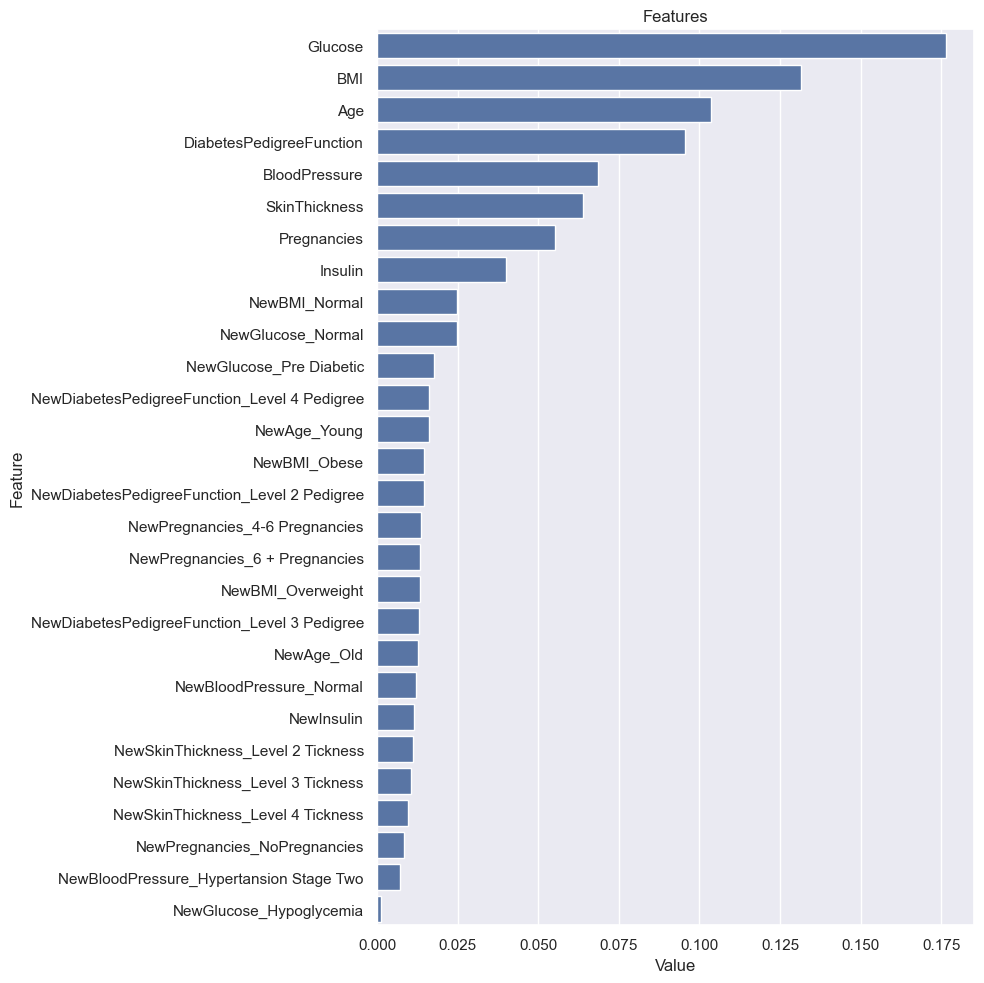

In [57]:
plot_importance(rf, X_train)

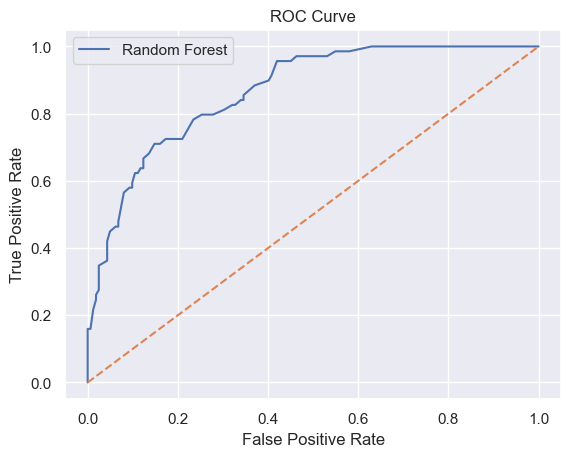

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

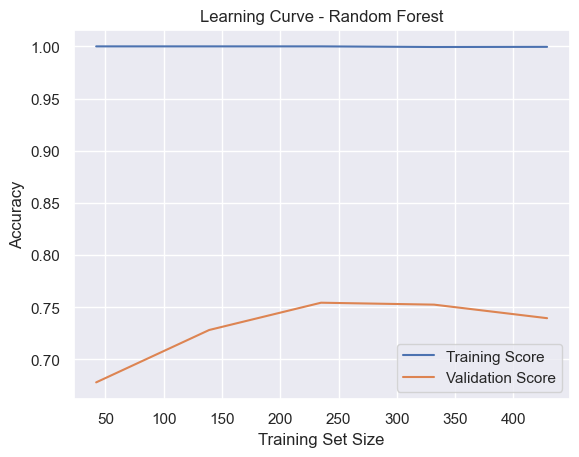

In [59]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Random Forest')
plt.show()

In [60]:
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Optimized Accuracy: 0.810

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       162
         1.0       0.70      0.62      0.66        69

    accuracy                           0.81       231
   macro avg       0.78      0.76      0.76       231
weighted avg       0.80      0.81      0.81       231



# LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [62]:
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.8095238095238095

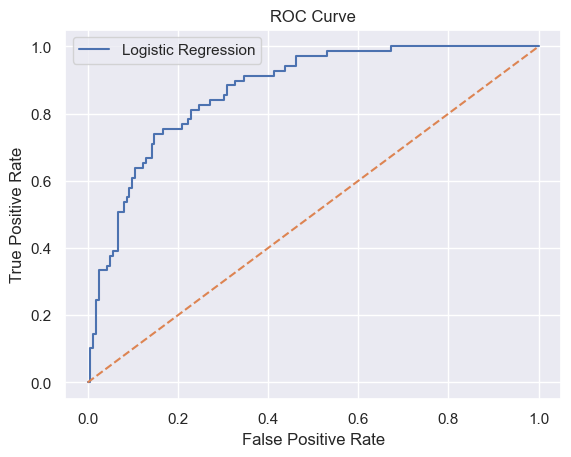

In [63]:
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


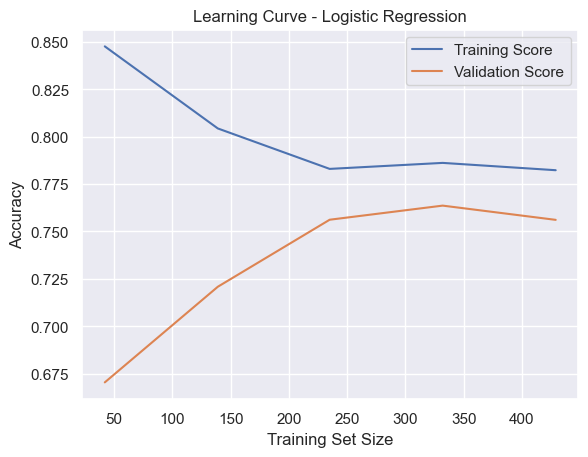

In [64]:
train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Logistic Regression')
plt.show()

In [65]:
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Optimized Accuracy: 0.810

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       162
         1.0       0.71      0.61      0.66        69

    accuracy                           0.81       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.80      0.81      0.80       231



# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [67]:
del max
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [68]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.95238095238095 % and k = [12]


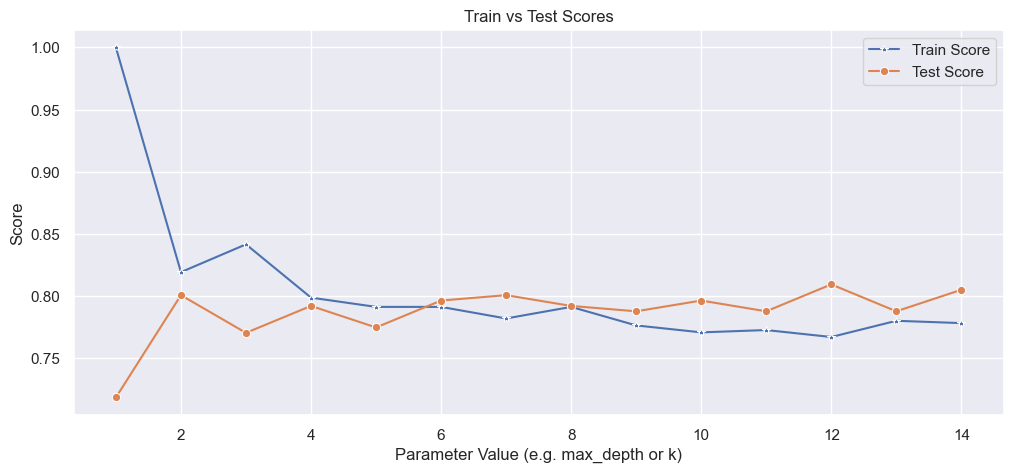

In [69]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.xlabel("Parameter Value (e.g. max_depth or k)")
plt.ylabel("Score")
plt.title("Train vs Test Scores")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8095238095238095

In [71]:
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Optimized Accuracy: 0.810

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       162
         1.0       0.71      0.61      0.66        69

    accuracy                           0.81       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.80      0.81      0.80       231



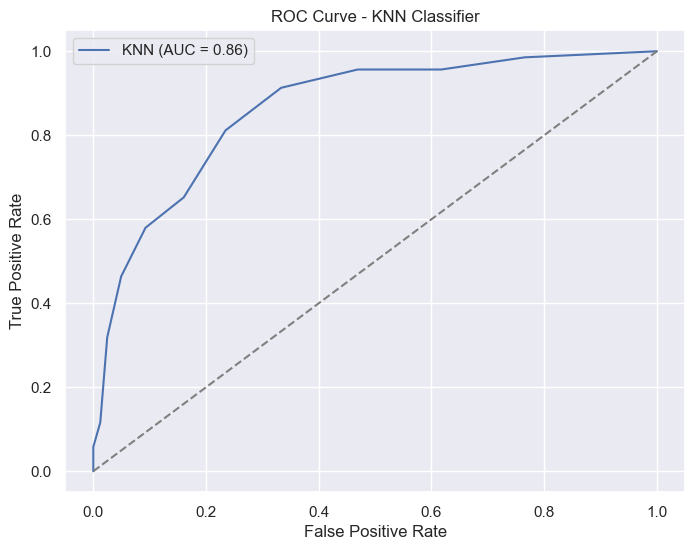

In [72]:
y_prob = knn.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()

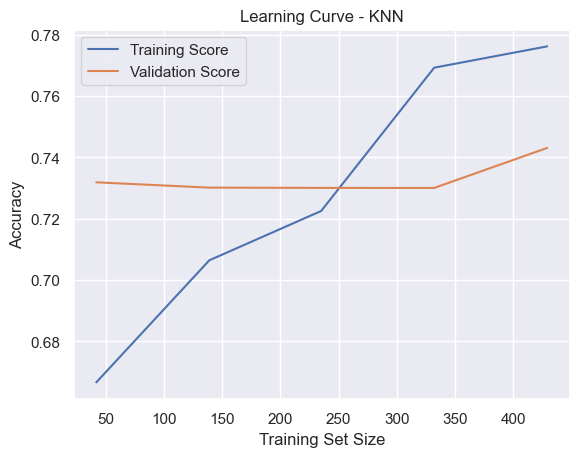

In [73]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - KNN')
plt.show()

In [74]:
# import image module
from IPython.display import Image

# get the image
Image(url="img/Report.png", width=700, height=700)